<a name="top"></a>
# Project 2

##  Problem Statement
Ascertain the important features that influence house prices both positively and negatively to ensure proper valuation. The proper valuation of houses would prevent another housing bubble from taking place.

## Executive Summary

After cleaning the data and filling in all the missing values. We focused on the visualizations where we observed specific features that were deemed to be important. Following the visualizations, we moved onto dropping some of these features as there was high collinearity and some had low variances. Next, we randomly split the train and the test results. After scaling based on the train data, we applied the scale for our test data. Then, we used GridsearchCV to find the best alpha value that we could use for the Lasso regression. Following that, the next step was to get the coefficients and to improve the model. Once, we had improved the model, we predicted the test value. To add on, the RMSE (error rate) was also calculated for reference. 

# Contents


- 1. [Cleaning Train Data](#Cleaning-Train-Data)
- 2. [Cleaning Test Data](#Cleaning-Test-Data)
- 3. [Combining & Altering Factors for Train Data](#Combining-Factors-for-Train-Data)
- 4. [Combining & Altering Factors for Test Data](#Combining-Factors-for-Test-Data)
- 5. [Visualizing Train Data, Dropping Unwanted Columns](#Visualizing-Train-Data)
- 6. [Train Dummies](#Train_Dummies)
- 7. [Train Subset](#Train_Subset)
- 8. [Filtering Test Dataset](#Filter_test)
- 9. [Test Subset ](#test_subset)
- 10. [Creating the Features & Target DataFrame](#features_target_df)
- 11. [Predicting the Test Score](#predict_test)
- 12. [ Business Recommendations](#business_recomm)




In [3968]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report
sns.set()
%matplotlib inline

In [3969]:
#Load CSV files 
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [3970]:
#Check the train df
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


---
<a name="Cleaning Train Data"></a>
## Cleaning Train Data

In [3971]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [3972]:
#Dropping the Pool QC, Fence ,Alley and Misc Feature as there is a high amount of nulls 
#We also have to drop  PID, ID details as they wouldnt help us in the model
train = train.drop(['Pool QC', 'Fence', 'Alley', 'PID', 'Id', 'Misc Feature'], axis = 1)
train.shape

(2051, 75)

In [3973]:
#To observe the Null values in specific columns 
train_null_values = train.isnull().sum()
train_null_values.sort_values().tail(25)

Exterior 2nd         0
Exter Qual           0
Exter Cond           0
Garage Area          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
Bsmt Half Bath       2
Bsmt Full Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Qual        114
Garage Cond        114
Garage Yr Blt      114
Garage Finish      114
Lot Frontage       330
Fireplace Qu      1000
dtype: int64

In [3974]:
#Look at all the basement values together
basement = train[['Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure', 'Bsmt Qual', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath' ]]
#basement.head()
basement_mask = (basement['Bsmt Qual'].isnull())
null_basement = basement[basement_mask]
null_basement
#As we can see when the Basement Qual is null we observe that all the other Basement elements are Null as well 

,Bsmt Cond,BsmtFin Type 1,BsmtFin Type 2,Bsmt Exposure,Bsmt Qual,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [3975]:
#We have identified the null values amongst the basement factors
null_basement.shape

(55, 11)

In [3976]:
#We need to change the null values into 0 when the basement is null as well 
train['Bsmt Qual'].fillna('None', inplace = True)
train['Bsmt Cond'].fillna('None', inplace = True)
train['BsmtFin Type 1'].fillna('None', inplace = True)
train['BsmtFin Type 2'].fillna('None', inplace = True)
train['Bsmt Exposure'].fillna('None', inplace = True)
train['BsmtFin SF 1'].fillna(0, inplace = True)
train['BsmtFin SF 2'].fillna(0, inplace = True)
train['Bsmt Unf SF'].fillna(0, inplace = True)
train['Total Bsmt SF'].fillna(0, inplace = True)
train['Bsmt Full Bath'].fillna(0, inplace = True)
train['Bsmt Half Bath'].fillna(0, inplace = True)


In [3977]:
#To check whether there are any more null values in the basement features
train.isnull().sum().sort_values().tail(15)

Exterior 1st         0
Roof Matl            0
Roof Style           0
Year Remod/Add       0
Garage Area          1
Garage Cars          1
Mas Vnr Type        22
Mas Vnr Area        22
Garage Type        113
Garage Qual        114
Garage Finish      114
Garage Yr Blt      114
Garage Cond        114
Lot Frontage       330
Fireplace Qu      1000
dtype: int64

In [3978]:
#Check the garage values 
garage = train [['Garage Area', 'Garage Cars', 'Garage Type' , 'Garage Finish', 'Garage Cond' ,'Garage Qual',"Garage Yr Blt"]]
#garage.head()
garage_mask = (garage['Garage Area'].isnull())
garage[garage_mask]

,Garage Area,Garage Cars,Garage Type,Garage Finish,Garage Cond,Garage Qual,Garage Yr Blt
1712,NaN,NaN,Detchd,NaN,NaN,NaN,NaN


In [3979]:
#We are creating a mask to segregate the Detchd Garage type 
garage_type_mask= (train['Garage Type']== 'Detchd')

#Then we are getting the mean area of the Detcd grage type
train[garage_type_mask]['Garage Area'].mean()


/Users/malai/anaconda3/lib/python3.7/site-packages/IPython/core/displayhook.py:271: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


419.54392523364487

In [3980]:
#We would place the mean to fill the garage area of the row 1712 which was previosly null
train.loc[1712 , 'Garage Area'] = 419.543

In [3981]:
#To check whether the value has changed
train.loc[1712]

MS SubClass            70
MS Zoning              RM
Lot Frontage           50
Lot Area             9060
Street               Pave
Lot Shape             Reg
Land Contour          Lvl
Utilities          AllPub
Lot Config         Inside
Land Slope            Gtl
Neighborhood       IDOTRR
Condition 1          Norm
Condition 2          Norm
Bldg Type            1Fam
House Style        2Story
Overall Qual            5
Overall Cond            6
Year Built           1923
Year Remod/Add       1999
Roof Style          Gable
Roof Matl         CompShg
Exterior 1st      Wd Sdng
Exterior 2nd      Plywood
Mas Vnr Type         None
Mas Vnr Area            0
Exter Qual             TA
Exter Cond             TA
Foundation         BrkTil
Bsmt Qual              Gd
Bsmt Cond              TA
                   ...   
Bsmt Full Bath          0
Bsmt Half Bath          0
Full Bath               2
Half Bath               0
Bedroom AbvGr           3
Kitchen AbvGr           1
Kitchen Qual           Gd
TotRms AbvGr

In [3982]:
#To check when the Garage Type is null are all the other garage related fields are null as well
garage_type_mask = (garage['Garage Type'].isnull())
garage[garage_type_mask]

,Garage Area,Garage Cars,Garage Type,Garage Finish,Garage Cond,Garage Qual,Garage Yr Blt
28,0.0,0.0,NaN,NaN,NaN,NaN,NaN
53,0.0,0.0,NaN,NaN,NaN,NaN,NaN
65,0.0,0.0,NaN,NaN,NaN,NaN,NaN
79,0.0,0.0,NaN,NaN,NaN,NaN,NaN
101,0.0,0.0,NaN,NaN,NaN,NaN,NaN
103,0.0,0.0,NaN,NaN,NaN,NaN,NaN
114,0.0,0.0,NaN,NaN,NaN,NaN,NaN
120,0.0,0.0,NaN,NaN,NaN,NaN,NaN
134,0.0,0.0,NaN,NaN,NaN,NaN,NaN
136,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [3983]:
train['Garage Area'].fillna(0, inplace = True)
train['Garage Cars'].fillna(0, inplace = True)
train['Garage Type'].fillna('None', inplace = True)
train['Garage Finish'].fillna('None', inplace = True)
train['Garage Cond'].fillna('None', inplace = True)
train['Garage Qual'].fillna('None', inplace = True)
train["Garage Yr Blt"].fillna(0, inplace = True)


In [3984]:
#Then we check how many null values we need to resolve before moving onto the next section 
train.isnull().sum().sort_values().tail(10)


Exter Cond         0
Exter Qual         0
Exterior 2nd       0
Exterior 1st       0
Roof Matl          0
Foundation         0
Mas Vnr Area      22
Mas Vnr Type      22
Lot Frontage     330
Fireplace Qu    1000
dtype: int64

In [3985]:
#We are filtering the Mas Vnr Data to figure out how many null values there are
mas = train[['Mas Vnr Area', 'Mas Vnr Type']]
mas_mask = (mas['Mas Vnr Area'].isnull())
mas[mas_mask].shape

(22, 2)

In [3986]:
#The 22 missing data will be filled in with None/O
train['Mas Vnr Area'].fillna(0, inplace = True)
train['Mas Vnr Type'].fillna('None', inplace = True)

In [3987]:
#To check how many other columns we need to work on
train.isnull().sum().sort_values().tail()

Exterior 1st       0
Roof Matl          0
Foundation         0
Lot Frontage     330
Fireplace Qu    1000
dtype: int64

In [3988]:
#Placing the average Lot Frontage into the null values
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(), inplace = True)

In [3989]:
#To check how many other columns we need to work on
train.isnull().sum().sort_values().tail()

Exterior 1st       0
Roof Matl          0
Roof Style         0
Exter Cond         0
Fireplace Qu    1000
dtype: int64

In [3990]:
#Checking Fire place quality with fireplace
fire = train[['Fireplace Qu' , 'Fireplaces']]
#Those with no Fireplace have no fireplace quality
#The number is evident
fire_place_mask = (fire['Fireplaces'] == 0)
fire[fire_place_mask].shape

(1000, 2)

In [3991]:
#We need to change the fireplace quality to none
train['Fireplace Qu'].fillna('None', inplace = True)

In [3992]:
train.isnull().sum().sort_values().tail()
#We can proceed with our analysis as there are no more missing values amongst the columns of the dataset

Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
Year Remod/Add    0
SalePrice         0
dtype: int64

In [3993]:
#Checking if the datatypes correspond to the columns with respect to the data dictionary
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 75 columns):
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       2051 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2051 non-null object
Exterior 1st       2051 non-null object
Exterior 2nd      

[Back to top](#top)

## Cleaning Test Data

In [3994]:
#Check the test df
#Note that the price column is not part of the test dataset. 
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [3995]:
#Before we move on, we need to make sure that all the columns that are in the train data are in the test data
train.columns.difference(test.columns)
#The only difference between the train and the test dataset is the SalePrice

Index(['SalePrice'], dtype='object')

In [3996]:
test.isnull().sum().sort_values().tail(20)

Overall Cond        0
Electrical          1
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Cond          25
BsmtFin Type 2     25
Bsmt Qual          25
BsmtFin Type 1     25
Bsmt Exposure      25
Garage Type        44
Garage Finish      45
Garage Yr Blt      45
Garage Qual        45
Garage Cond        45
Lot Frontage      160
Fireplace Qu      422
Fence             707
Alley             821
Misc Feature      838
Pool QC           875
dtype: int64

In [3997]:
# We would first drop everthything that we had dropped in the Train dataset
test = test.drop(['Pool QC', 'Fence', 'Alley', 'PID','Misc Feature'], axis = 1)
test.shape

(879, 75)

In [3998]:
# To Check the cleaning progress
test.isnull().sum().sort_values().tail(18)

Exterior 2nd        0
Year Built          0
Exter Qual          0
Mas Vnr Type        1
Mas Vnr Area        1
Electrical          1
Bsmt Exposure      25
Bsmt Cond          25
Bsmt Qual          25
BsmtFin Type 2     25
BsmtFin Type 1     25
Garage Type        44
Garage Finish      45
Garage Yr Blt      45
Garage Cond        45
Garage Qual        45
Lot Frontage      160
Fireplace Qu      422
dtype: int64

In [3999]:
#To check whether the null values of fireplace are the ones with no fireplace
firez = test[['Fireplaces', 'Fireplace Qu']]
fire_place_masked = (firez['Fireplaces'] == 0 & (firez['Fireplace Qu'].isnull()))
firez[fire_place_masked].shape

(422, 2)

In [4000]:
#We need to change the fireplace quality to none
test['Fireplace Qu'].fillna('None', inplace = True)

In [4001]:
#We need to findout whether the houses without a lot area have null Lot Frontage values
lot_test = test[['Lot Frontage', 'Lot Area']]
lot_test_mask = ((lot_test['Lot Area'] == 0) & (lot_test['Lot Frontage'].isnull()) )
lot_test[lot_test_mask].shape
#There are no empty Lot Areas when the Lot frontage details are missing

(0, 2)

In [4002]:
#To see some of the rows with null Lot Frontage Values where there is a lot Area
lot_test[lot_test['Lot Frontage'].isnull()].tail(10)

,Lot Frontage,Lot Area
833,NaN,12782
840,NaN,9759
843,NaN,23595
847,NaN,19900
852,NaN,9790
854,NaN,7032
860,NaN,8780
867,NaN,7777
868,NaN,5062
870,NaN,36500


In [4003]:
# Filling the empty lot frontage values with its mean
test['Lot Frontage'].fillna(test['Lot Frontage'].mean(), inplace = True)

In [4004]:
#Finding out the garage missing values
garagez = test [['Garage Area', 'Garage Cars', 'Garage Type' , 'Garage Finish', 'Garage Cond' ,'Garage Qual',"Garage Yr Blt"]]
#garage.head()
garage_masked = (garagez['Garage Cond'].isnull())
garagez[garage_masked]


,Garage Area,Garage Cars,Garage Type,Garage Finish,Garage Cond,Garage Qual,Garage Yr Blt
29,0,0,NaN,NaN,NaN,NaN,NaN
45,0,0,NaN,NaN,NaN,NaN,NaN
66,0,0,NaN,NaN,NaN,NaN,NaN
68,0,0,NaN,NaN,NaN,NaN,NaN
106,0,0,NaN,NaN,NaN,NaN,NaN
110,0,0,NaN,NaN,NaN,NaN,NaN
114,0,0,NaN,NaN,NaN,NaN,NaN
145,0,0,NaN,NaN,NaN,NaN,NaN
153,0,0,NaN,NaN,NaN,NaN,NaN
157,0,0,NaN,NaN,NaN,NaN,NaN


In [4005]:
test['Garage Cond'].mode()

0    TA
dtype: object

In [4006]:
(test['Garage Finish'].mode())

0    Unf
dtype: object

In [4007]:
(test['Garage Qual'].mode())

0    TA
dtype: object

In [4008]:
(test['Garage Yr Blt'].mean())

1976.7961630695443

In [4009]:
#fill the garage values for row 765 of the test set as it has some missing values
test.loc[765, 'Garage Cond'] = 'TA'
test.loc[765, 'Garage Finish'] = 'Unf'
test.loc[765, 'Garage Qual'] = 'TA'
test.loc[765, 'Garage Yr Blt'] = 1976

In [4010]:
#Checking to see whether the values of the row 765 have changed 
test.loc[765]

Id                   1357
MS SubClass            60
MS Zoning              RM
Lot Frontage           57
Lot Area             8094
Street               Pave
Lot Shape             Reg
Land Contour          Lvl
Utilities          AllPub
Lot Config         Inside
Land Slope            Gtl
Neighborhood      OldTown
Condition 1          Norm
Condition 2          Norm
Bldg Type          2fmCon
House Style        2.5Unf
Overall Qual            6
Overall Cond            8
Year Built           1910
Year Remod/Add       1983
Roof Style          Gable
Roof Matl         CompShg
Exterior 1st      Wd Sdng
Exterior 2nd      Wd Sdng
Mas Vnr Type         None
Mas Vnr Area            0
Exter Qual             TA
Exter Cond             TA
Foundation          PConc
Bsmt Qual              TA
                   ...   
Gr Liv Area          1984
Bsmt Full Bath          0
Bsmt Half Bath          0
Full Bath               2
Half Bath               0
Bedroom AbvGr           5
Kitchen AbvGr           1
Kitchen Qual

In [4011]:
#To check how many rows have a Garage Area of 0
garage_masked = (garagez['Garage Area'] == 0)
garagez[garage_masked].shape

(44, 7)

In [4012]:
#We need to fill the missing values
test['Garage Type'].fillna('None', inplace = True)
test['Garage Finish'].fillna('None', inplace = True)
test['Garage Cond'].fillna('None', inplace = True)
test['Garage Qual'].fillna('None', inplace = True)
test["Garage Yr Blt"].fillna(0, inplace = True)

In [4013]:
#Checking the cleaning progress of our test data
test.isnull().sum().sort_values().tail(10)

Roof Style         0
Sale Type          0
Mas Vnr Area       1
Electrical         1
Mas Vnr Type       1
Bsmt Qual         25
Bsmt Cond         25
Bsmt Exposure     25
BsmtFin Type 1    25
BsmtFin Type 2    25
dtype: int64

In [4014]:
#Checking for the Basement null values
base_test = test[['Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Qual', 'Total Bsmt SF']]
base_test_mask = (base_test['Total Bsmt SF'] == 0) #Are the Nulls in the Basement values due to the lack of a basement
base_test[base_test_mask].shape
#The values that are empty in Bsmt are null values

(25, 6)

In [4015]:
#Filling in the null values of Garage

test['Bsmt Qual'].fillna('None', inplace = True)
test['Bsmt Cond'].fillna('None', inplace = True)
test['BsmtFin Type 1'].fillna('None', inplace = True)
test['BsmtFin Type 2'].fillna('None', inplace = True)
test['Bsmt Exposure'].fillna('None', inplace = True)



In [4016]:
#Check if the Mas Vnr type is null corresponds with the null Mas Vnr Area
vnr_test = test[['Mas Vnr Type', 'Mas Vnr Area']]
vnr_test_mask = ((test['Mas Vnr Area'].isnull()) & (test['Mas Vnr Type'].isnull()))
vnr_test[(vnr_test_mask)]

,Mas Vnr Type,Mas Vnr Area
866,NaN,NaN


In [4017]:
# Since both the Mas Vnr Type and Mas Vnr area are missing from the same row 886, we need to fill them
test.loc[866, 'Mas Vnr Type'] = 'None'
test.loc[866, 'Mas Vnr Area'] = 0
test.loc[866]

Id                    868
MS SubClass            60
MS Zoning              RL
Lot Frontage           70
Lot Area             8749
Street               Pave
Lot Shape             Reg
Land Contour          Lvl
Utilities          AllPub
Lot Config         Inside
Land Slope            Gtl
Neighborhood      CollgCr
Condition 1          Norm
Condition 2          Norm
Bldg Type            1Fam
House Style        2Story
Overall Qual            7
Overall Cond            5
Year Built           2002
Year Remod/Add       2002
Roof Style          Gable
Roof Matl         CompShg
Exterior 1st      VinylSd
Exterior 2nd      VinylSd
Mas Vnr Type         None
Mas Vnr Area            0
Exter Qual             Gd
Exter Cond             TA
Foundation          PConc
Bsmt Qual              Gd
                   ...   
Gr Liv Area          1725
Bsmt Full Bath          0
Bsmt Half Bath          0
Full Bath               2
Half Bath               1
Bedroom AbvGr           3
Kitchen AbvGr           1
Kitchen Qual

In [4018]:
#Check which row has the Na value for the electrical column 
elt = test[['Electrical']]
elt_mask = (elt['Electrical'].isnull())
elt[elt_mask]

,Electrical
635,NaN


In [4019]:
#Changing the value of row 635
test.loc[635, 'Electrical'] = 'None'

In [4020]:
#Checking the 635 row
test.loc[635, 'Electrical']

'None'

[Back to top](#top)

<a name="Combining-Factors-for-Train-Data"></a>
## Combining & Altering Factors for Train Data


In [4021]:
#We can add up some values that are related with each other 
train['Total SF'] = train['Total Bsmt SF'] + train['Gr Liv Area']

In [4022]:
train =train.drop(['Total Bsmt SF' , 'Gr Liv Area' , '1st Flr SF', '2nd Flr SF' , 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'] , axis = 1)

In [4023]:
train.shape

(2051, 69)

In [4024]:
#Adding all the porch areas 
train['Total Porch'] = train['Open Porch SF'] +train['Enclosed Porch'] + train['3Ssn Porch'] + train['Screen Porch']

In [4025]:
train['Total Porch'].head()

0    44
1    74
2    52
3     0
4    59
Name: Total Porch, dtype: int64

In [4026]:
train = train.drop(['Open Porch SF', 'Enclosed Porch','3Ssn Porch','Screen Porch'] , axis =1 )

In [4027]:
train.shape

(2051, 66)

In [4028]:
train['Condition 1'].mode()

0    Norm
dtype: object

In [4029]:
train['Condition 2'].mode()

0    Norm
dtype: object

In [4030]:
condition = train[['Condition 1' , 'Condition 2']]
condition_mask = ((train['Condition 1'] == 'Norm') & (train['Condition 2'] == 'Norm'))
condition[condition_mask].shape

(1767, 2)

In [4031]:
conditioned_mask = ((train['Condition 1'] != 'Norm') & (train['Condition 2'] == 'Norm'))
condition[conditioned_mask].shape

(258, 2)

In [4032]:
#Most of the Condition 2 is normal ,as such condition 2 will be removed
train = train.drop(['Condition 2'] , axis = 1)

In [4033]:
train.shape

(2051, 65)

In [4034]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MS SubClass,2051.0,57.008776,42.824223,20.0,20.0,50.0000,70.0,190.0
Lot Frontage,2051.0,69.055200,21.306357,21.0,60.0,69.0552,78.0,313.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0000,11513.5,159000.0
Overall Qual,2051.0,6.112140,1.426271,1.0,5.0,6.0000,7.0,10.0
Overall Cond,2051.0,5.562165,1.104497,1.0,5.0,5.0000,6.0,9.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0000,2001.0,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0000,2004.0,2010.0
Mas Vnr Area,2051.0,98.626524,174.324690,0.0,0.0,0.0000,159.0,1600.0
Low Qual Fin SF,2051.0,5.512921,51.068870,0.0,0.0,0.0000,0.0,1064.0
Bsmt Full Bath,2051.0,0.427109,0.522589,0.0,0.0,0.0000,1.0,3.0


[Back to top](#top)

<a name="Combining-Factors-for-Test-Data"></a>
## Combining & Altering Factors for Test Data

In [4035]:
test['Total SF'] = test['Total Bsmt SF'] + test['Gr Liv Area']

In [4036]:
test =test.drop(['Total Bsmt SF' , 'Gr Liv Area' , '1st Flr SF', '2nd Flr SF' , 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF'] , axis = 1)

In [4037]:
#Most of the Condition 2 is normal ,as such condition 2 will be removed
test = test.drop(['Condition 2'] , axis = 1)

In [4038]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,879.0,1445.588168,850.717105,2.0,692.5,1435.000000,2197.0,2928.0
MS SubClass,879.0,58.270762,42.211389,20.0,20.0,50.000000,70.0,190.0
Lot Frontage,879.0,69.630042,21.364544,21.0,60.0,69.630042,78.5,182.0
Lot Area,879.0,10340.920364,10047.335167,1477.0,7298.5,9453.000000,11606.5,215245.0
Overall Qual,879.0,6.054608,1.374756,2.0,5.0,6.000000,7.0,10.0
Overall Cond,879.0,5.565415,1.128422,1.0,5.0,5.000000,6.0,9.0
Year Built,879.0,1970.533561,30.403527,1880.0,1954.0,1972.000000,2000.0,2010.0
Year Remod/Add,879.0,1984.444824,20.454546,1950.0,1967.0,1992.000000,2003.0,2010.0
Mas Vnr Area,879.0,106.861206,188.284115,0.0,0.0,0.000000,173.0,1378.0
Low Qual Fin SF,879.0,2.725825,32.554124,0.0,0.0,0.000000,0.0,481.0


In [4039]:
#Adding all the porch areas 
test['Total Porch'] = test['Open Porch SF'] +test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch']

In [4040]:
test['Total Porch'].head()

0    172
1      0
2     24
3    184
4    261
Name: Total Porch, dtype: int64

In [4041]:
test = test.drop(['Open Porch SF', 'Enclosed Porch','3Ssn Porch','Screen Porch'] , axis =1 )

In [4042]:
#Checking for number of columns in test dataset
test.shape

(879, 65)

[Back to top](#top)

<a name="Visualizing-Train-Data"></a>
## Visualizing Train Data, Dropping Unwanted Columns

In [4043]:
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Y

In [4044]:
train = train[['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',  'Total SF', 'Total Porch',
       'SalePrice']]

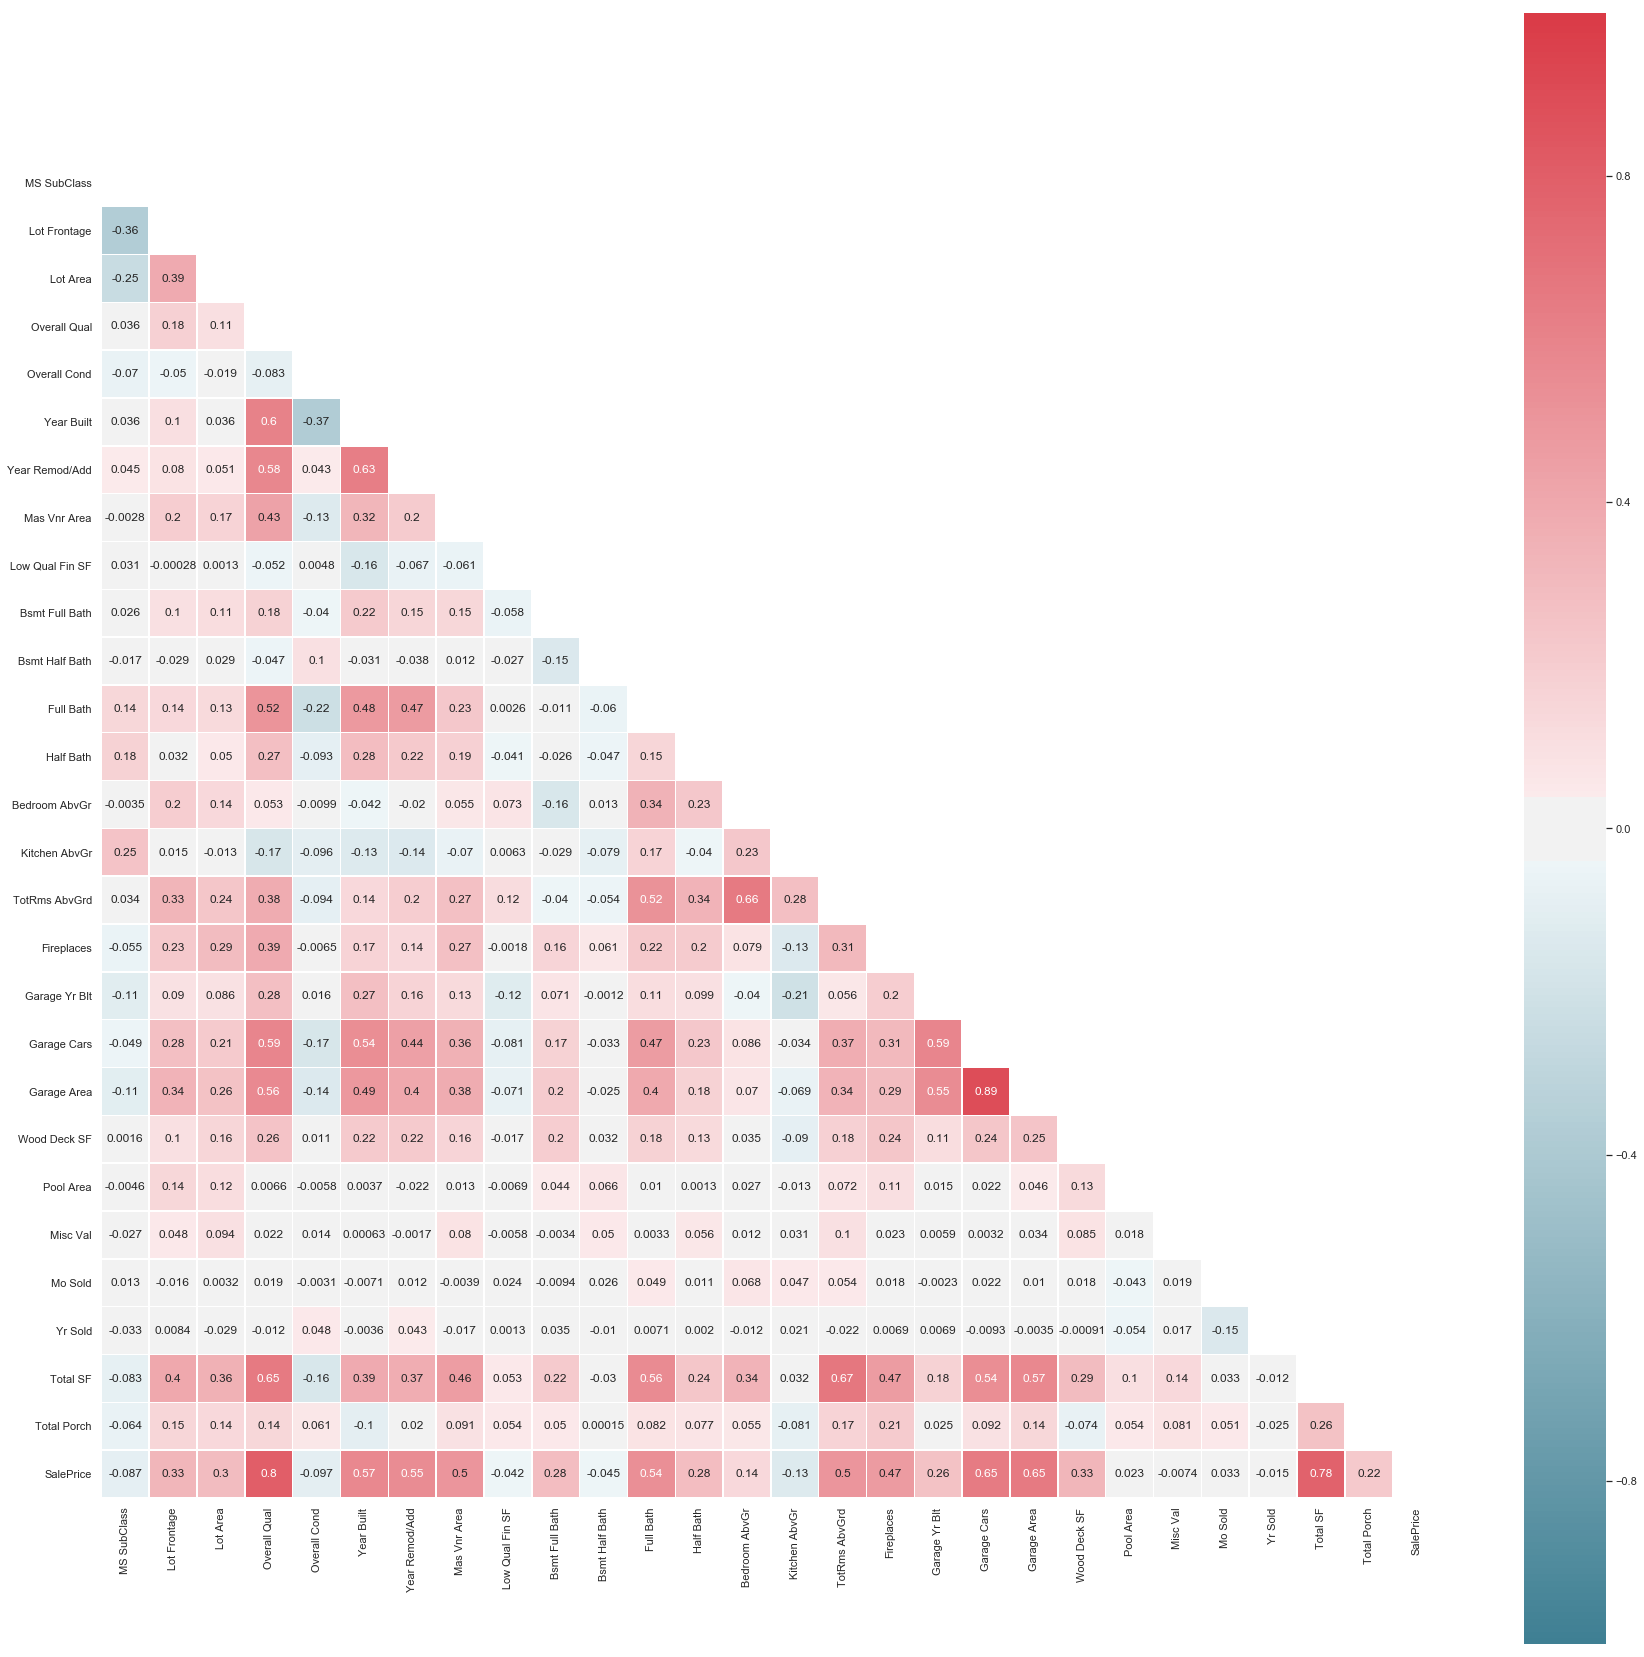

In [4045]:
#Done with cleaning, we need to do the correlation matrix (Heatmap)
# Compute the correlation matrix
sns.set(style="white")
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, annot  = True)


In [4046]:
#Garage Cars and Garage Area seems to be highly correlated. Thus, we can see which of the two has a higher variance and keep that.
train['Garage Cars'].var()

0.5857711288960723

In [4047]:
train['Garage Area'].var()

46606.41782802435

In [4048]:
#We will drop the Garage Cars as it has a lower variance
train = train.drop('Garage Cars', axis = 1)

In [4049]:
#To check if Garage Cars has been dropped 
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 'Sale 

In [4050]:
#Changing the ordinal data into a continuous format 
ordinal_5 = {"Ex" : 5 , "Gd" : 4 , "TA" : 3 , "Fa" : 2 , "Po" : 1, 'NA' : 0, 'None': 0}
train['Exter Cond'] = train['Exter Cond'].map(ordinal_5)

In [4051]:
train['Exter Cond'].head()

0    3
1    3
2    4
3    3
4    3
Name: Exter Cond, dtype: int64

In [4052]:
#Chnaging the columns which have oridinal data to have a continuous format

train['Exter Qual'] = train['Exter Qual'].map(ordinal_5)
train['Bsmt Qual'] = train['Bsmt Qual'].map(ordinal_5)
train['Bsmt Cond'] = train['Bsmt Cond'].map(ordinal_5)
train['Heating QC'] = train['Heating QC'].map(ordinal_5)
train['Kitchen Qual'] = train['Kitchen Qual'].map(ordinal_5)
train['Fireplace Qu'] = train['Fireplace Qu'].map(ordinal_5)
train['Garage Qual'] = train['Garage Qual'].map(ordinal_5)
train['Garage Cond'] = train['Garage Cond'].map(ordinal_5)

In [4053]:
ordinal_4 = {"Gd" : 4 , "Av" : 3 , "Mn" : 2 , "No" : 1, 'NA' : 0, 'None': 0}
train['Bsmt Exposure'] = train['Bsmt Exposure'].map(ordinal_4)

fin_type = {'GLQ': 6 , 'ALQ': 5 , 'BLQ': 4 , 'Rec': 3 , 'LwQ': 2 , 'Unf': 1 , 'NA': 0, 'None': 0}
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map(fin_type)
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map(fin_type)

In [4054]:
cen_air = {'Y': 1 , 'N': 0 , 'None': 0}
train['Central Air'] = train['Central Air'].map(cen_air)

In [4055]:
gar_fin = {'Fin': 3 , 'RFn': 2 , 'Unf': 1 , 'NA': 0, 'None': 0 }

In [4056]:
train['Garage Finish'] = train['Garage Finish'].map(gar_fin)

In [4057]:
pvd_dri = {'Y': 3 , 'P': 2, 'N': 1}

train['Paved Drive'] = train['Paved Drive'].map(pvd_dri)

In [4058]:
#Utilities as a ordinal 
uti = {'AllPub' :3 , 'NoSwr': 2, 'NoSeWa': 1 , 'ELO': 0}
train['Utilities'] = train['Utilities'].map(uti)


In [4059]:
#To check whether the ordinal data has been changed properly
train['Garage Finish'].unique()

array([2, 1, 3, 0])

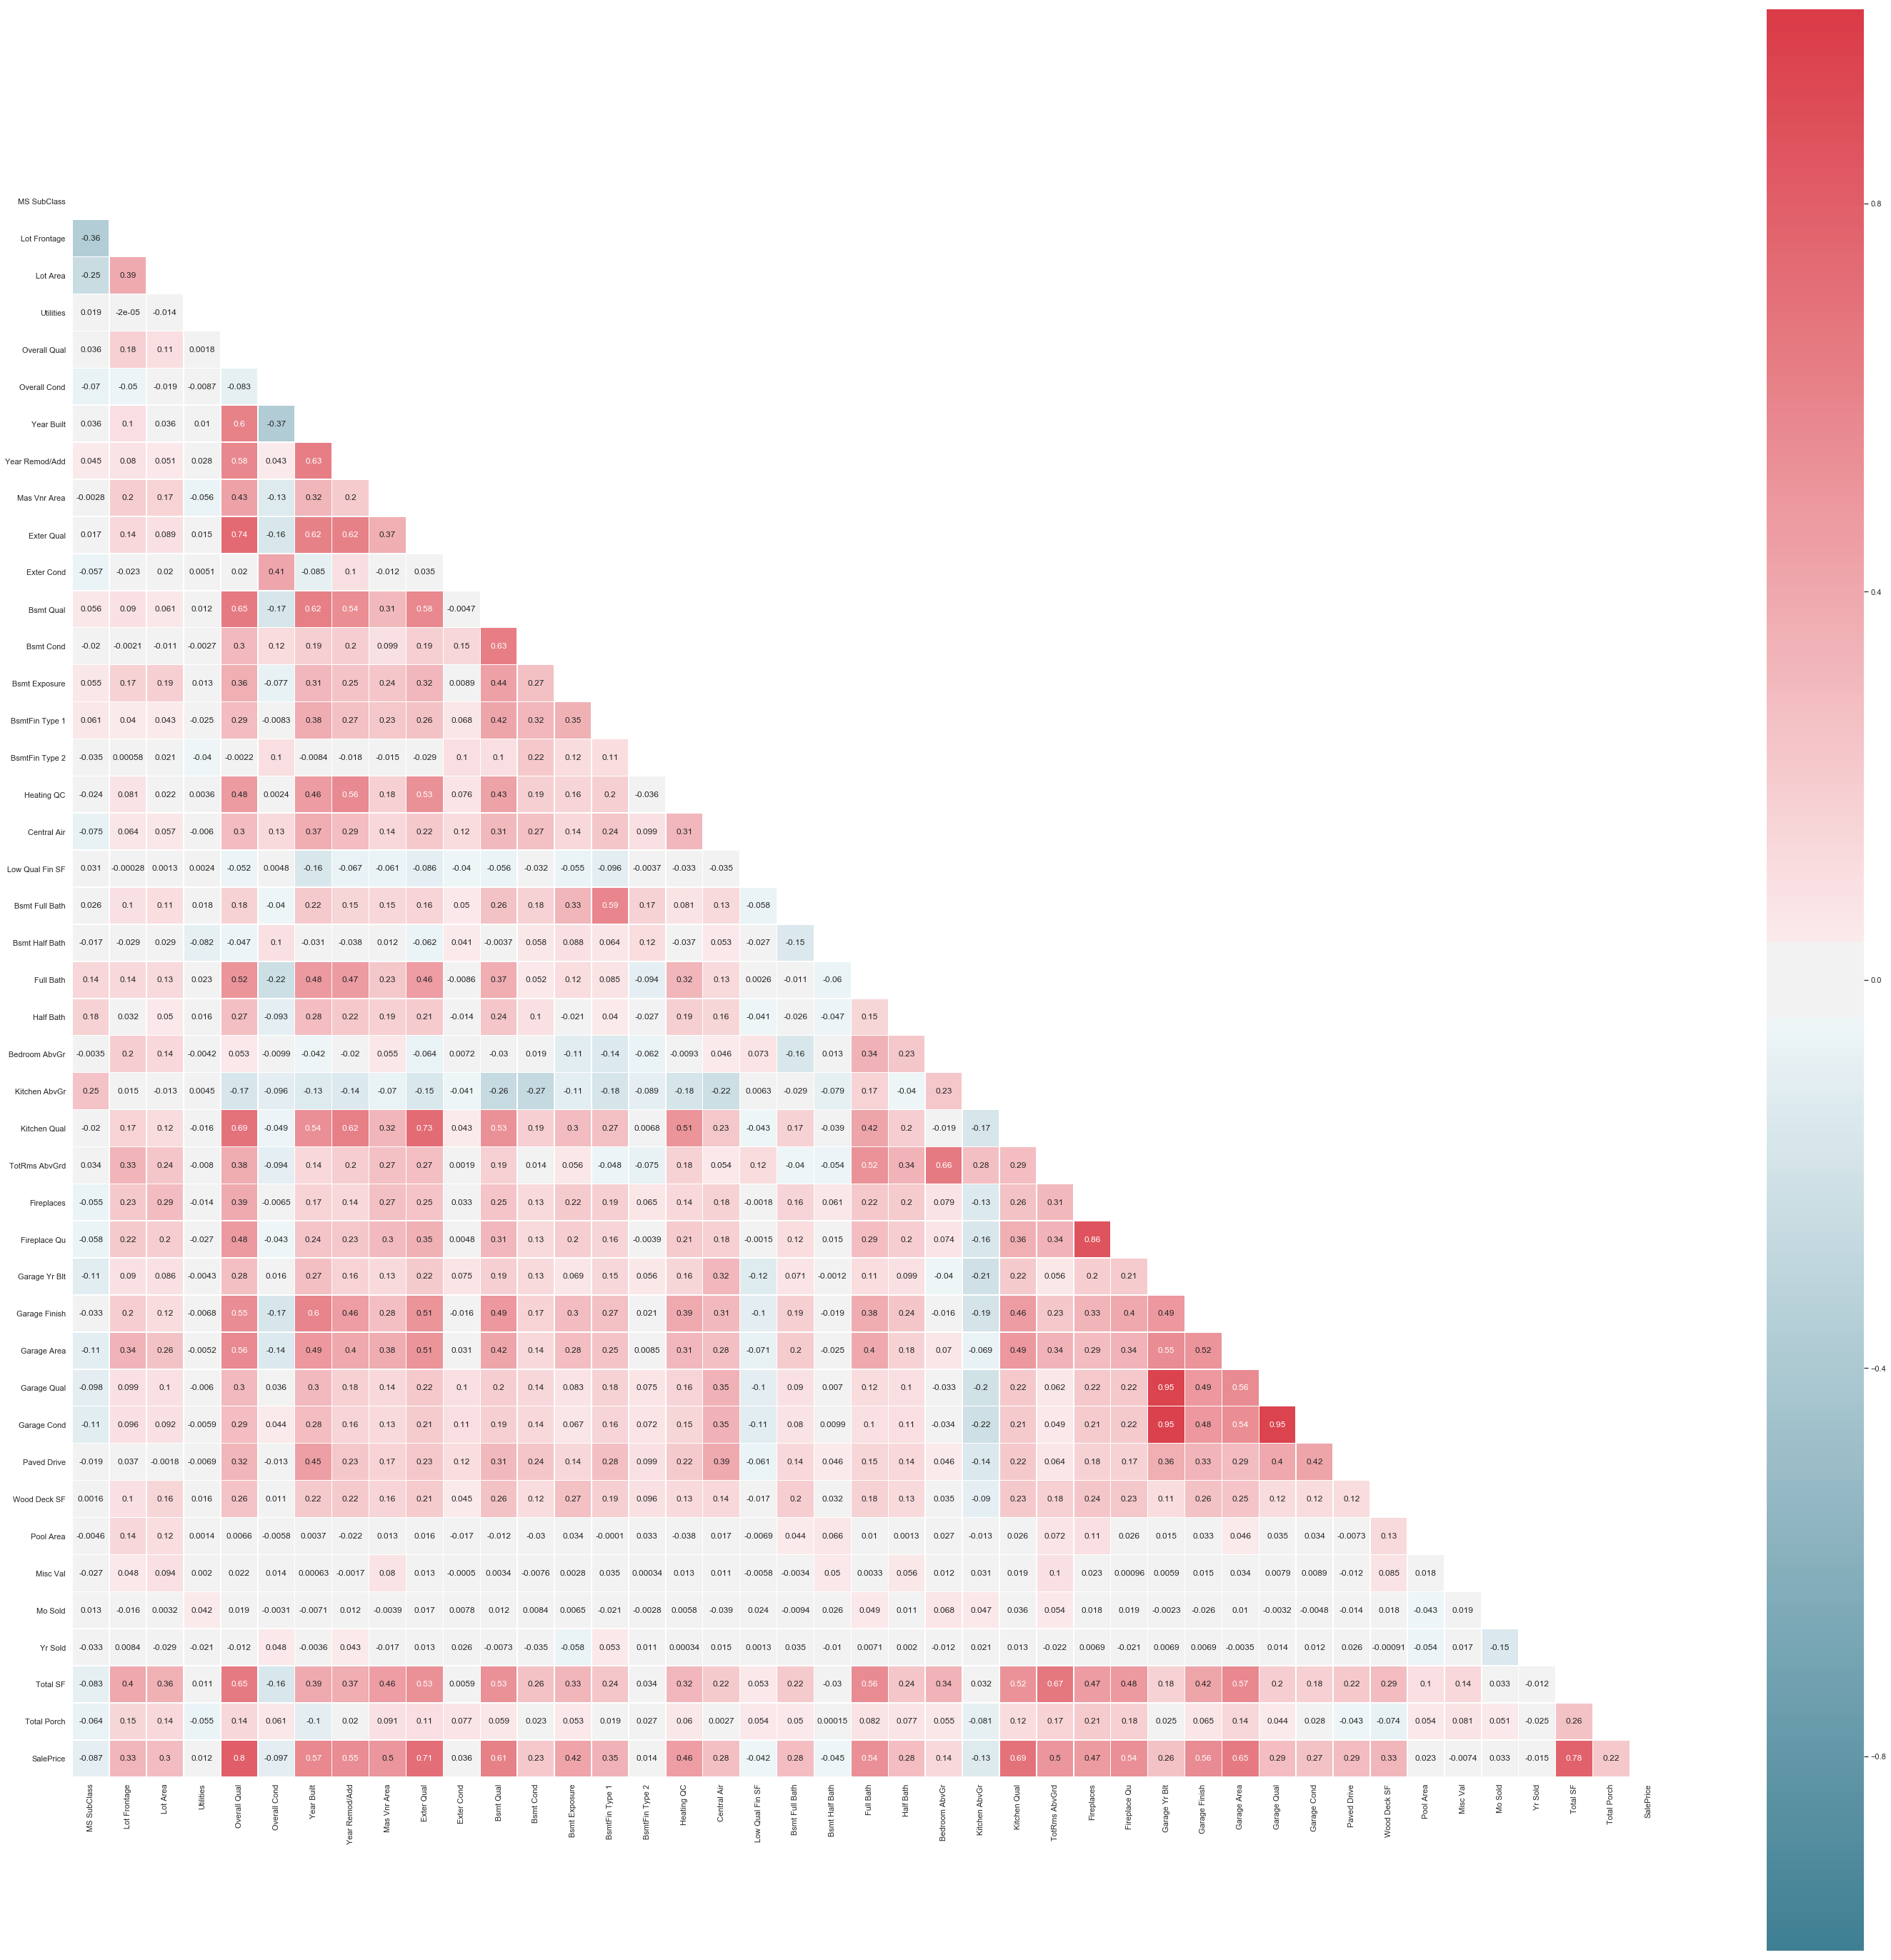

In [4060]:
#Done with cleaning, we need to do the correlation matrix (Heatmap)
# Compute the correlation matrix
sns.set(style="white")
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, annot  = True)


In [4061]:
# After changing some of the features into ordinal data
# We can now remove some of thefeatures that are not highly correlated with the target
train = train.drop(['MS SubClass', 'Overall Cond', 'Low Qual Fin SF' , 'Bsmt Half Bath' ,'Bedroom AbvGr', 'Kitchen AbvGr', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold','Lot Frontage', 'Lot Area', 'Utilities', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 'Bsmt Full Bath', 'Half Bath', 'Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF', 'Total Porch'] , axis =1 )

In [4062]:
# We will now double check the columns we have on our train dataset
train.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual',
       'Bsmt Exposure', 'Heating', 'Heating QC', 'Electrical', 'Full Bath',
       'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Area',
       'Sale Type', 'Total SF', 'SalePrice'],
      dtype='object')

In [4063]:
categorical_features = train.select_dtypes(include = 'object').columns

In [4064]:
categorical_features

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Foundation', 'Heating', 'Electrical', 'Functional',
       'Garage Type', 'Sale Type'],
      dtype='object')

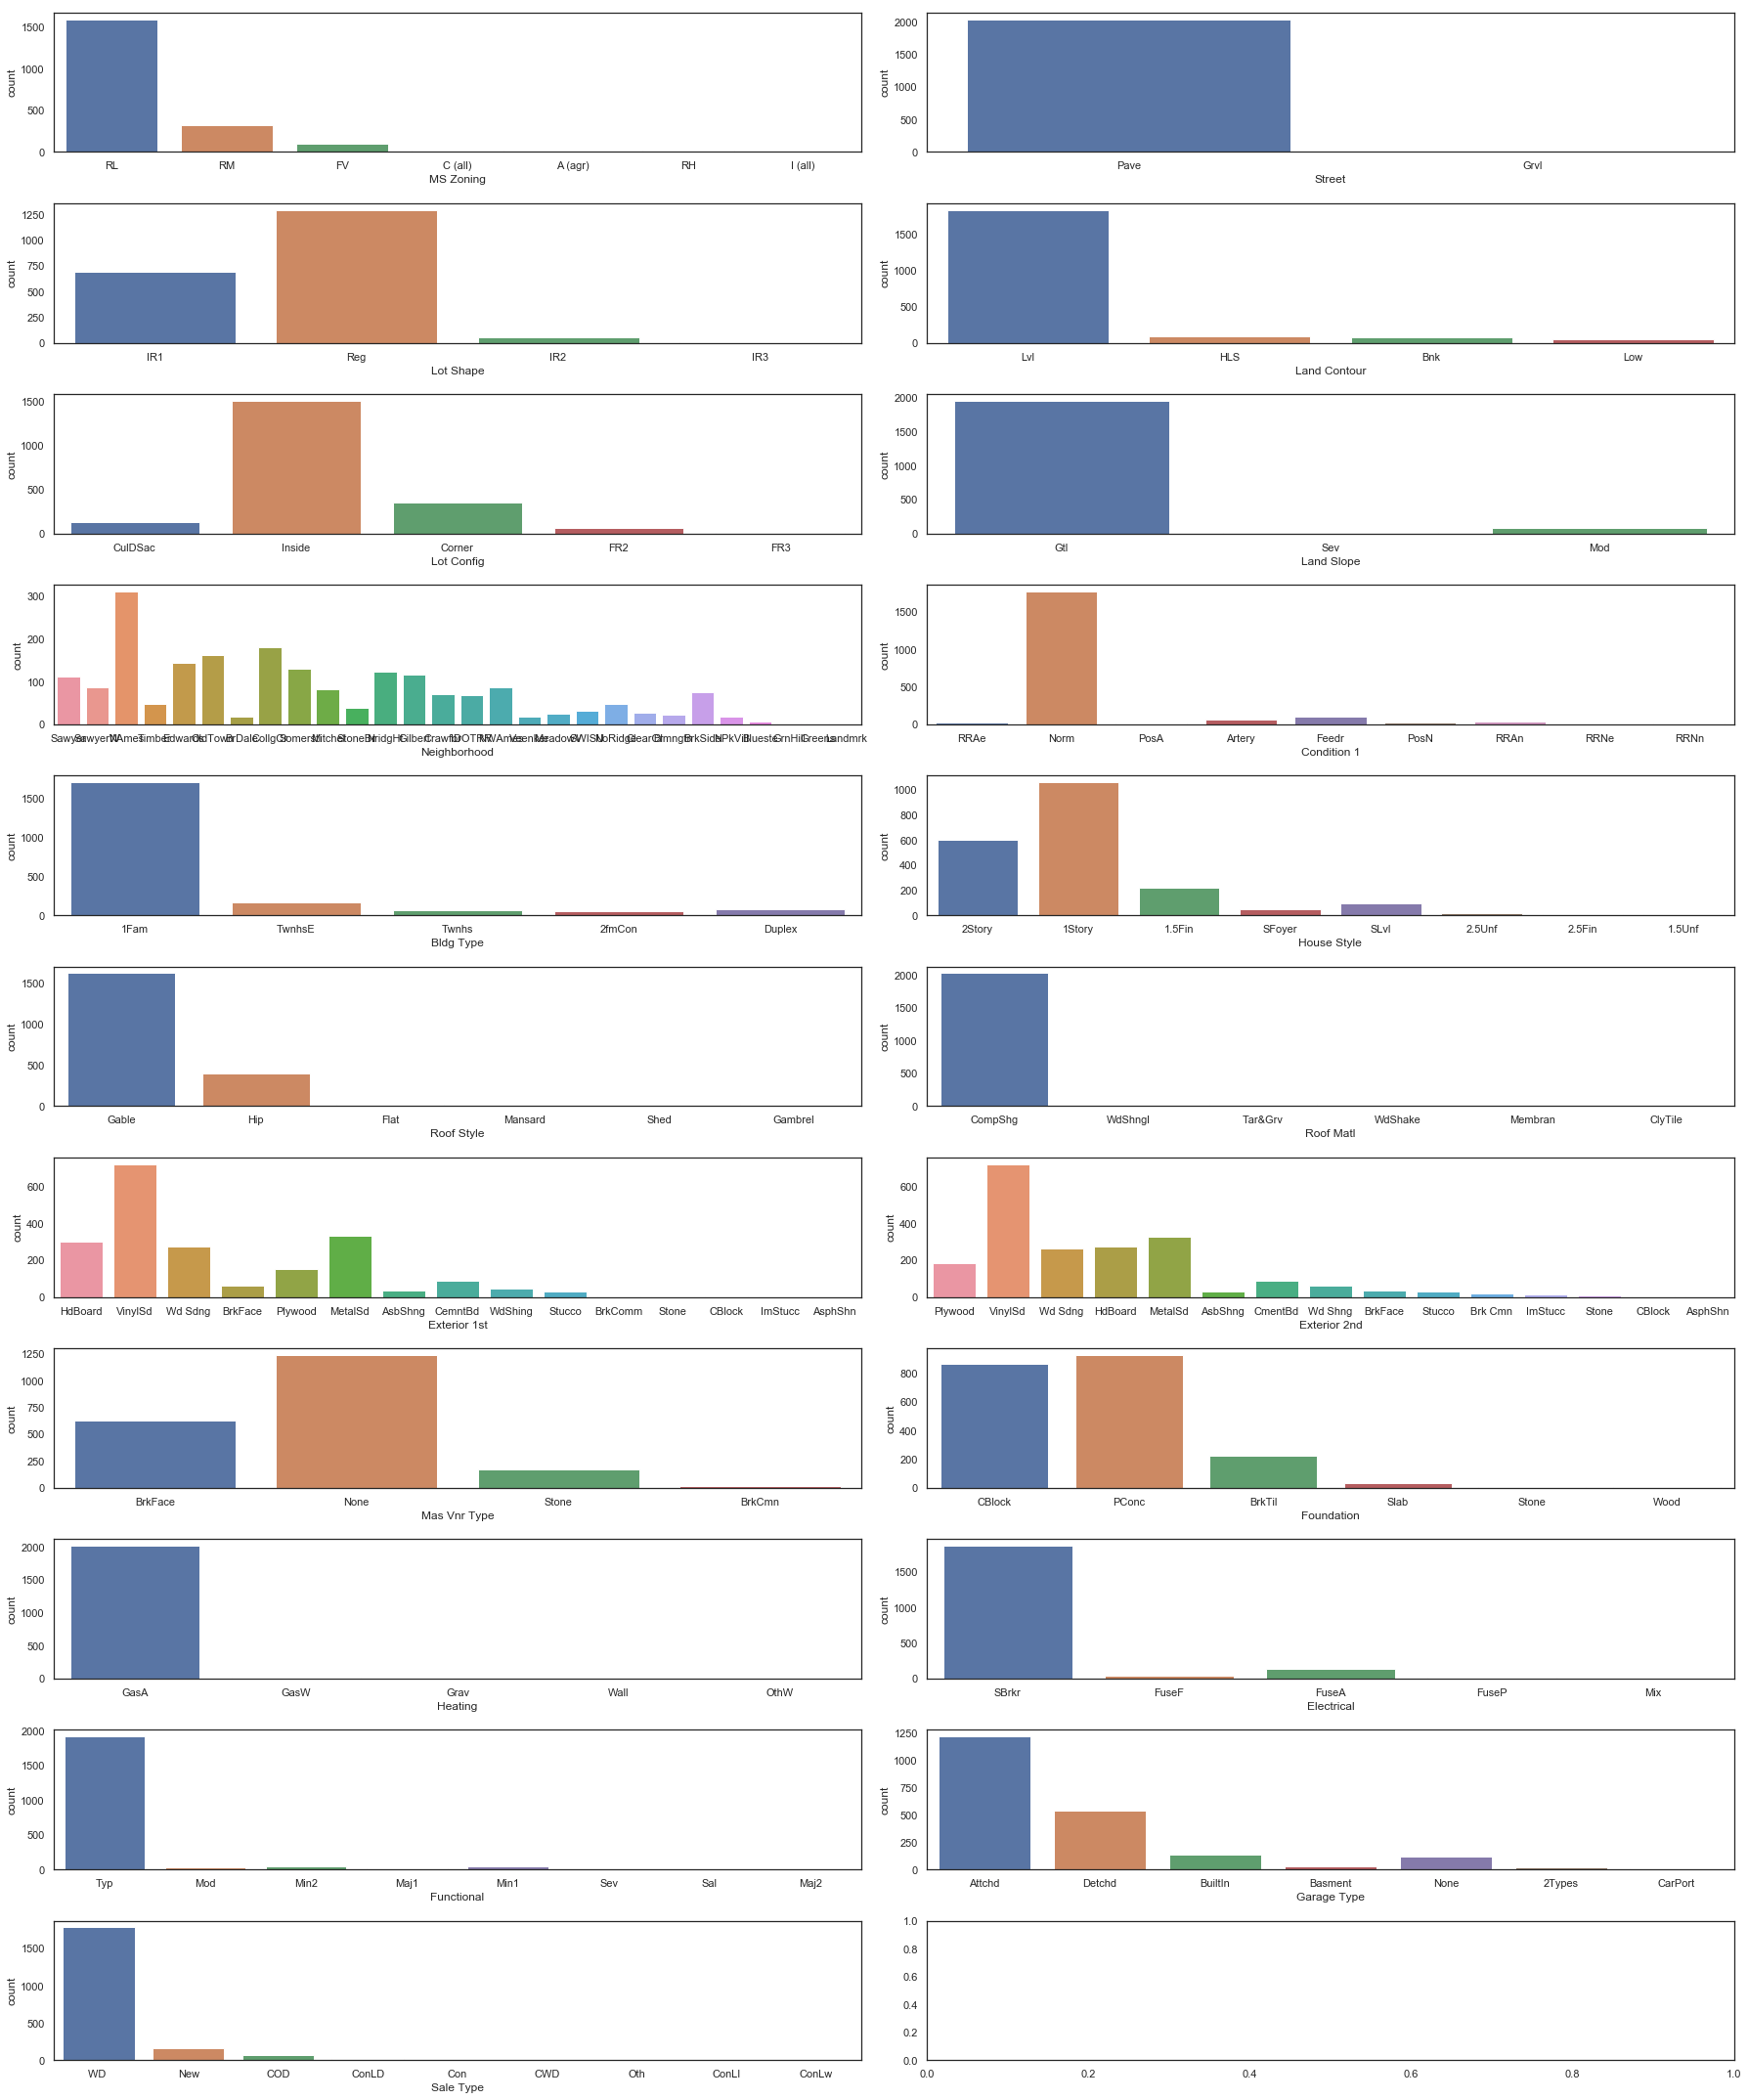

In [4065]:
#Plotting count plots of categorical features
fig, ax = plt.subplots(11, 2, figsize=(25, 30), squeeze = False)
for variable, subplot in zip(train[categorical_features], ax.flatten()):
    sns.countplot(train[variable], ax=subplot)
    fig.tight_layout()

In [4066]:
#Drop the features which most houses have in commom as such there isnt much variability in the distribution of these features
train = train.drop(['Street','Land Slope', 'Roof Matl' , 'Heating', 'Functional'], axis = 1)

In [4067]:
train.select_dtypes(include = 'object').columns

Index(['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Neighborhood',
       'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Electrical',
       'Garage Type', 'Sale Type'],
      dtype='object')

[Back to top](#top)

<a name="Train_Dummies"></a>

## Train Dummies

In [4068]:
# We will now change some of the nominal columns through get dummies 

train_with_dummies = pd.get_dummies(train, columns=['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
       'Electrical', 'Garage Type', 'Sale Type'], drop_first=True)

In [4069]:
train_with_dummies.head()

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,Heating QC,Full Bath,Kitchen Qual,...,Garage Type_Detchd,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,6,1976,2005,289.0,4,3,1,5,2,4,...,0,0,0,0,0,0,0,0,0,1
1,7,1996,1997,132.0,4,4,1,5,2,4,...,0,0,0,0,0,0,0,0,0,1
2,5,1953,2007,0.0,3,3,1,3,1,4,...,1,0,0,0,0,0,0,0,0,1
3,5,2006,2007,0.0,3,4,1,4,2,3,...,0,0,0,0,0,0,0,0,0,1
4,6,1900,1993,0.0,3,2,1,3,2,3,...,1,0,0,0,0,0,0,0,0,1


In [4070]:
#Check the correlation of train with dummies and the sale price to get the features 
abs(train_with_dummies.corrwith(train_with_dummies['SalePrice'])).sort_values(ascending = False).head(30)

SalePrice               1.000000
Overall Qual            0.800207
Total SF                0.779416
Exter Qual              0.712146
Kitchen Qual            0.692336
Garage Area             0.650284
Bsmt Qual               0.612188
Year Built              0.571849
Garage Finish           0.557839
Year Remod/Add          0.550370
Fireplace Qu            0.538925
Full Bath               0.537969
Foundation_PConc        0.529047
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Fireplaces              0.471093
Heating QC              0.458354
Neighborhood_NridgHt    0.448647
Bsmt Exposure           0.424863
Mas Vnr Type_None       0.411170
Garage Type_Detchd      0.370344
Sale Type_New           0.358102
Garage Type_Attchd      0.357879
Foundation_CBlock       0.355535
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Mas Vnr Type_Stone      0.310026
Lot Shape_Reg           0.306291
MS Zoning_RM            0.281951
Roof Style_Hip          0.265224
dtype: flo

<a name="Train_Subset"></a>
## Train Subset

In [4071]:
# Forming a new dataframe called Train_subset to hold all the important features
train_subset = pd.DataFrame(train_with_dummies, columns= ['SalePrice','Overall Qual','Total SF','Exter Qual','Kitchen Qual','Garage Area','Bsmt Qual','Year Built','Year Remod/Add',
                                               'Fireplace Qu','Full Bath' ,'Foundation_PConc','TotRms AbvGrd','Mas Vnr Area','Fireplaces','Heating QC','Neighborhood_NridgHt',
                                               'Garage Finish','Bsmt Exposure','Mas Vnr Type_None','Garage Type_Detchd','Sale Type_New','Garage Type_Attchd','Foundation_CBlock',
                                               'Exterior 1st_VinylSd' ,'Exterior 2nd_VinylSd','Mas Vnr Type_Stone','Lot Shape_Reg','MS Zoning_RM','Roof Style_Hip'])

In [4072]:
train_subset.head()

,SalePrice,Overall Qual,Total SF,Exter Qual,Kitchen Qual,Garage Area,Bsmt Qual,Year Built,Year Remod/Add,Fireplace Qu,...,Garage Type_Detchd,Sale Type_New,Garage Type_Attchd,Foundation_CBlock,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Mas Vnr Type_Stone,Lot Shape_Reg,MS Zoning_RM,Roof Style_Hip
0,130500,6,2204.0,4,4,475.0,3,1976,2005,0,...,0,0,1,1,0,0,0,0,0,0
1,220000,7,3035.0,4,4,559.0,4,1996,1997,3,...,0,0,1,0,1,1,0,0,0,0
2,109000,5,2114.0,3,4,246.0,3,1953,2007,0,...,1,0,0,1,1,1,0,1,0,0
3,174000,5,1828.0,3,3,400.0,4,2006,2007,0,...,0,0,0,0,1,1,0,1,0,0
4,138500,6,2121.0,3,3,484.0,2,1900,1993,0,...,1,0,0,0,0,0,0,0,0,0


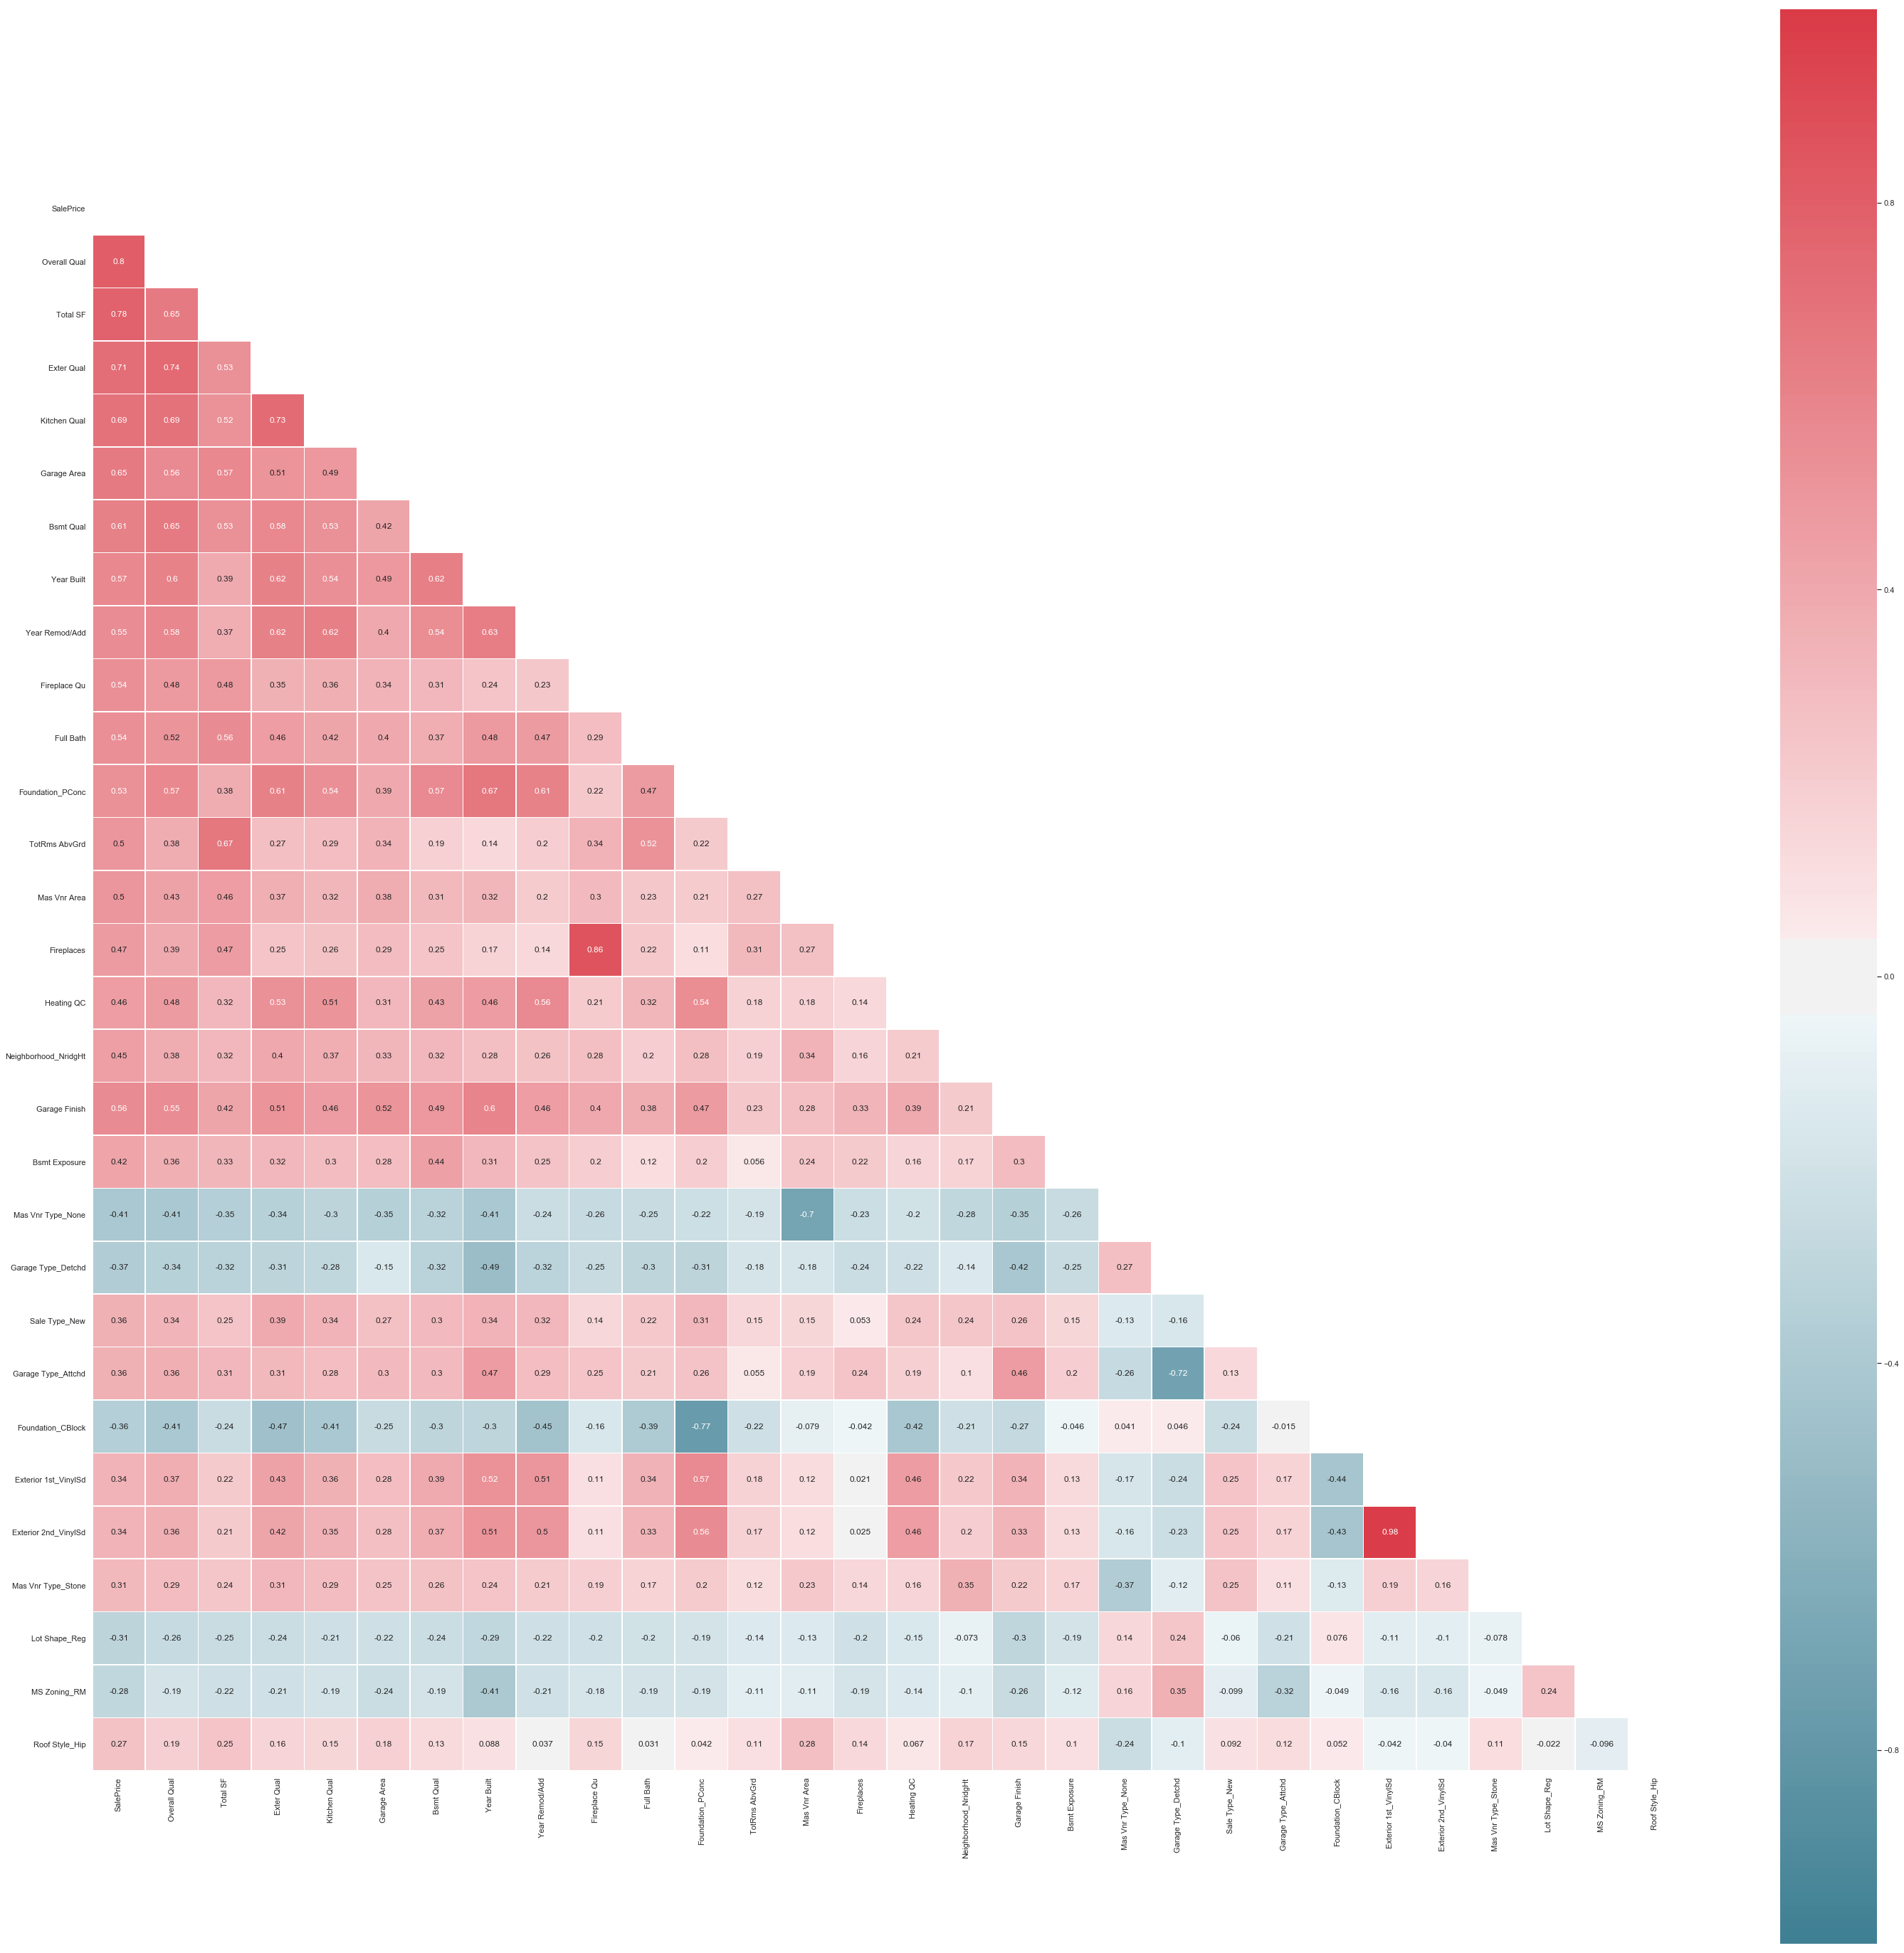

In [4073]:
#Final view of the correlation between the target and the features
corr = train_subset.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, annot  = True)

In [4074]:
#Combining both the fireplacequ and the fireplace into one feature
train_subset['Total_Firepl'] = train_subset['Fireplace Qu'] * train_subset['Fireplaces']
train_subset.head()

,SalePrice,Overall Qual,Total SF,Exter Qual,Kitchen Qual,Garage Area,Bsmt Qual,Year Built,Year Remod/Add,Fireplace Qu,...,Sale Type_New,Garage Type_Attchd,Foundation_CBlock,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Mas Vnr Type_Stone,Lot Shape_Reg,MS Zoning_RM,Roof Style_Hip,Total_Firepl
0,130500,6,2204.0,4,4,475.0,3,1976,2005,0,...,0,1,1,0,0,0,0,0,0,0
1,220000,7,3035.0,4,4,559.0,4,1996,1997,3,...,0,1,0,1,1,0,0,0,0,3
2,109000,5,2114.0,3,4,246.0,3,1953,2007,0,...,0,0,1,1,1,0,1,0,0,0
3,174000,5,1828.0,3,3,400.0,4,2006,2007,0,...,0,0,0,1,1,0,1,0,0,0
4,138500,6,2121.0,3,3,484.0,2,1900,1993,0,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ac2cc0780>,
      dtype=object)

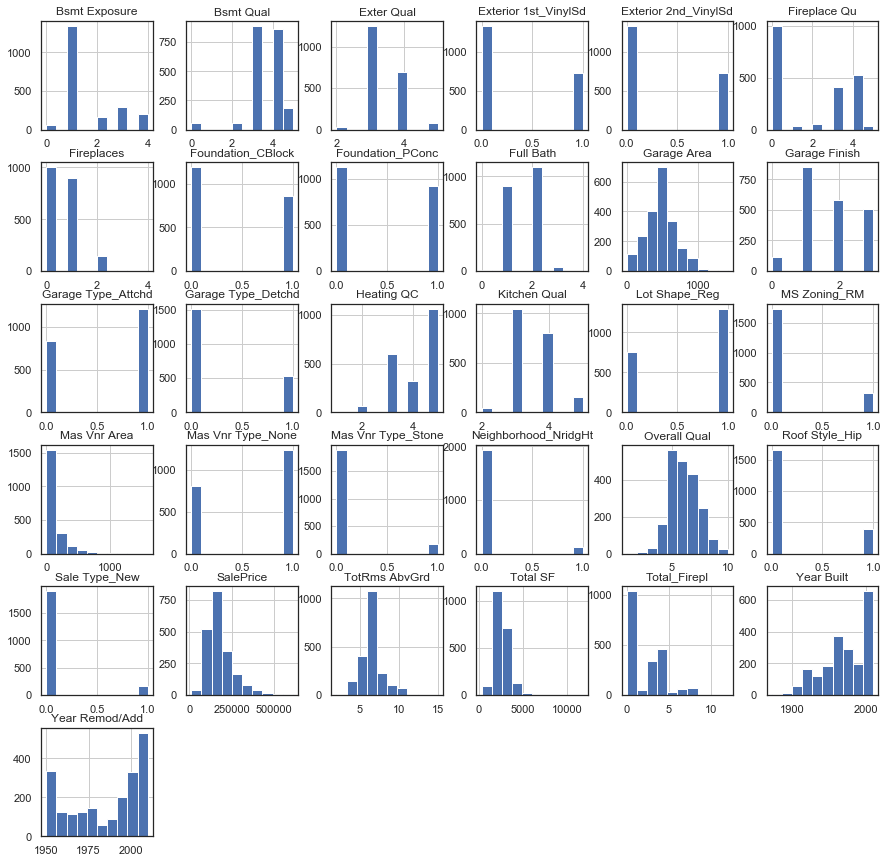

In [4075]:
train_subset.hist(figsize=(15, 15))

In [4076]:
#Dropping External Quality as its highly correlated with overal Qual, 
#Dropping Foundation_CBlock as its negatively correlated with Foundation_Pcone
#Dropping Fireplaces and Fireplaces Qu as we have a new combined feature
#Dropping Exterior 1st Vinylsd as its positively correlated with Exterior 2nd Vinylsd
#Dropping Year Remove/ Added as its highly correlated with Year Built
#Removing Kitchen Quality as its highly correlated with the Overall Qual
#Drop Sale_type_new, Roof Style_Hip, MS_Zoning Rm, Garage_Type_Detchd, year built
#Mas Vnr Area, Mas Vnr Stone, Exterior 1st Vinyl and 2nd as there is a low variability in score
train_subset = train_subset.drop(['Exter Qual', 'Mas Vnr Type_None','Garage Type_Attchd', 'Foundation_CBlock', 'Fireplaces',
                                  'Fireplace Qu','Exterior 1st_VinylSd','Year Remod/Add','Kitchen Qual','Sale Type_New', 
                                  'Mas Vnr Type_Stone', 'Lot Shape_Reg','Mas Vnr Area','Garage Type_Detchd','Year Built','Exterior 2nd_VinylSd'], axis = 1)


train_subset.head()

,SalePrice,Overall Qual,Total SF,Garage Area,Bsmt Qual,Full Bath,Foundation_PConc,TotRms AbvGrd,Heating QC,Neighborhood_NridgHt,Garage Finish,Bsmt Exposure,MS Zoning_RM,Roof Style_Hip,Total_Firepl
0,130500,6,2204.0,475.0,3,2,0,6,5,0,2,1,0,0,0
1,220000,7,3035.0,559.0,4,2,1,8,5,0,2,1,0,0,3
2,109000,5,2114.0,246.0,3,1,0,5,3,0,1,1,0,0,0
3,174000,5,1828.0,400.0,4,2,1,7,4,0,3,1,0,0,0
4,138500,6,2121.0,484.0,2,2,1,6,3,0,1,1,0,0,0


In [4077]:
train_subset.columns

Index(['SalePrice', 'Overall Qual', 'Total SF', 'Garage Area', 'Bsmt Qual',
       'Full Bath', 'Foundation_PConc', 'TotRms AbvGrd', 'Heating QC',
       'Neighborhood_NridgHt', 'Garage Finish', 'Bsmt Exposure',
       'MS Zoning_RM', 'Roof Style_Hip', 'Total_Firepl'],
      dtype='object')

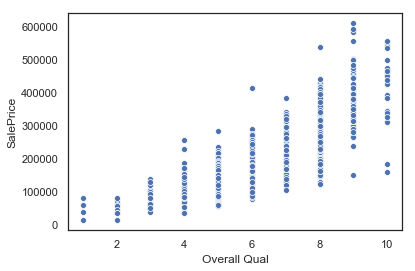

In [4078]:
#Plotting some scatter plot of features against the sale price
sns.scatterplot(x = train_subset['Overall Qual'], y = train_subset['SalePrice'])

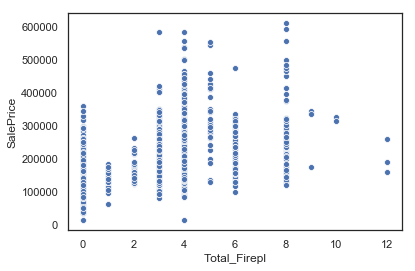

In [4079]:
#Plotting some scatter plot of features against the sale price
sns.scatterplot(x = train_subset['Total_Firepl'], y = train_subset['SalePrice'])

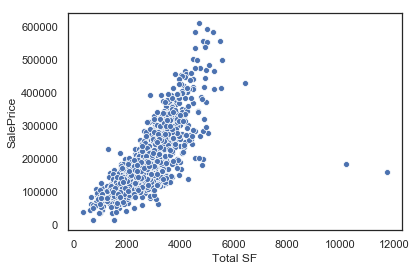

In [4080]:
#Plotting some scatter plot of features against the sale price
sns.scatterplot(x = train_subset['Total SF'], y = train_subset['SalePrice'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1ac2e5f5f8>,
      dtype=object)

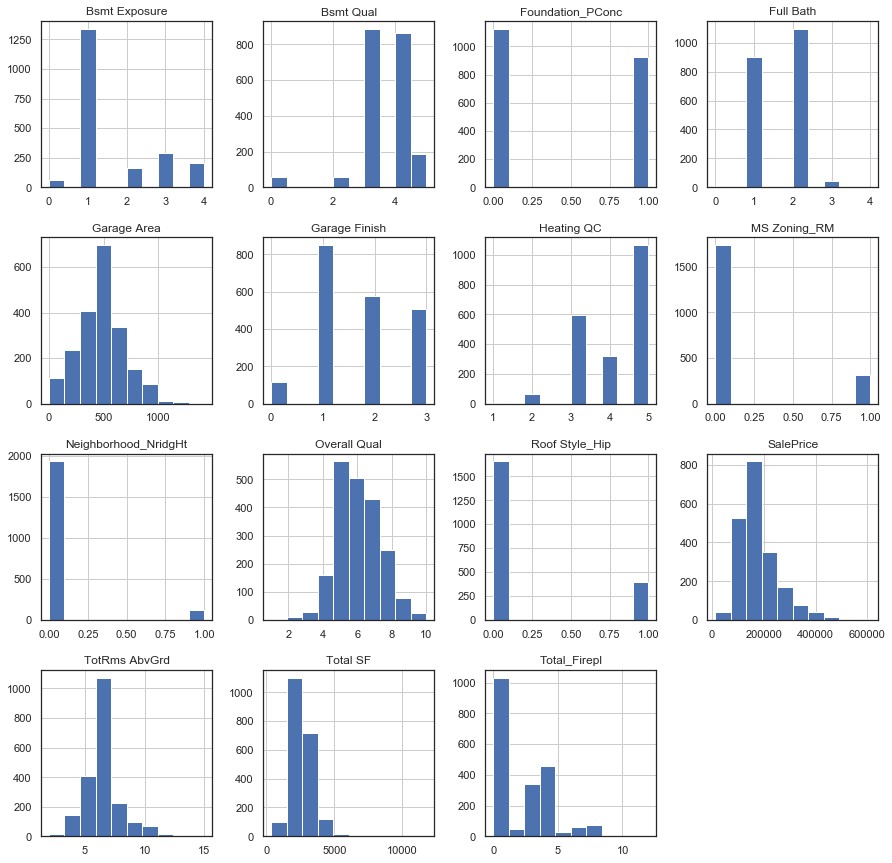

In [4081]:
train_subset.hist(figsize=(15, 15))

[Back to top](#top)

<a name="Filter_test"></a>
## Filtering Out Features from Test Dataset

In [4082]:
#We will drop the Garage Cars as it has a lower variance in the test set
test = test.drop('Garage Cars', axis = 1)

In [4083]:
#To check if Garage Cars has been dropped 
test.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Low Qual Fin SF', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'Garage Finish', 'Garage Area', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val', 'Mo Sold',
       'Yr Sold', 

In [4084]:
#Chaniging the ordinal data into a continuous format 
ordinal_5 = {"Ex" : 5 , "Gd" : 4 , "TA" : 3 , "Fa" : 2 , "Po" : 1, 'NA' : 0, 'None': 0}
test['Exter Cond'] = test['Exter Cond'].map(ordinal_5)

In [4085]:
#Chnaging the columns which have oridinal data to have a continuous format

test['Exter Qual'] = test['Exter Qual'].map(ordinal_5)
test['Bsmt Qual'] = test['Bsmt Qual'].map(ordinal_5)
test['Bsmt Cond'] = test['Bsmt Cond'].map(ordinal_5)
test['Heating QC'] = test['Heating QC'].map(ordinal_5)
test['Kitchen Qual'] = test['Kitchen Qual'].map(ordinal_5)
test['Fireplace Qu'] = test['Fireplace Qu'].map(ordinal_5)
test['Garage Qual'] = test['Garage Qual'].map(ordinal_5)
test['Garage Cond'] = test['Garage Cond'].map(ordinal_5)

In [4086]:

test['Bsmt Exposure'] = test['Bsmt Exposure'].map(ordinal_4)

test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map(fin_type)
test['BsmtFin Type 2'] = test['BsmtFin Type 2'].map(fin_type)

In [4087]:
test['Central Air'] = test['Central Air'].map(cen_air)

In [4088]:
test['Garage Finish'] = test['Garage Finish'].map(gar_fin)

In [4089]:
pvd_dri = {'Y': 3 , 'P': 2, 'N': 1}

test['Paved Drive'] = test['Paved Drive'].map(pvd_dri)

In [4090]:
#Utilities as a ordinal 
uti = {'AllPub' :3 , 'NoSwr': 2, 'NoSeWa': 1 , 'ELO': 0}
test['Utilities'] = test['Utilities'].map(uti)


In [4091]:
#We have drop the features that were dropped in the training data
test = test.drop(['MS SubClass', 'Overall Cond', 'Low Qual Fin SF' , 'Bsmt Half Bath' ,'Bedroom AbvGr',
                  'Kitchen AbvGr', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold','Lot Frontage', 'Lot Area', 
                  'Utilities', 'Exter Cond', 'Bsmt Cond', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air', 
                  'Bsmt Full Bath', 'Half Bath', 'Garage Yr Blt', 'Garage Qual', 'Garage Cond', 'Paved Drive', 
                  'Wood Deck SF', 'Total Porch', 'Street', 'Roof Matl' , 'Heating', 'Functional'] , axis =1 )

In [4092]:
test_with_dummies = pd.get_dummies(test, columns=['MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
       'Electrical', 'Garage Type', 'Sale Type'], drop_first=True)

In [4093]:
test_with_dummies.head()

,Id,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,Heating QC,Full Bath,...,Garage Type_None,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD
0,2658,6,1910,1950,0.0,3,2,1,4,2,...,0,0,0,0,0,0,0,0,0,1
1,2718,5,1977,1977,0.0,3,4,1,3,2,...,0,0,0,0,0,0,0,0,0,1
2,2414,7,2006,2006,0.0,4,4,3,5,2,...,0,0,0,0,0,0,1,0,0,0
3,1989,5,1923,2006,0.0,4,3,1,3,1,...,0,0,0,0,0,0,0,0,0,1
4,625,6,1963,1963,247.0,3,4,1,4,1,...,0,0,0,0,0,0,0,0,0,1


In [4094]:
final_test_with_id = test_with_dummies

[Back to top](#top)

<a name="test_subset"></a>

## Test Subset

In [4095]:
test_subset = pd.DataFrame(test_with_dummies, columns= ['Overall Qual','Total SF','Exter Qual','Kitchen Qual','Garage Area','Bsmt Qual','Year Built','Year Remod/Add',
                                               'Fireplace Qu','Full Bath' ,'Foundation_PConc','TotRms AbvGrd','Mas Vnr Area','Fireplaces','Heating QC','Neighborhood_NridgHt',
                                               'Garage Finish','Bsmt Exposure','Mas Vnr Type_None','Garage Type_Detchd','Sale Type_New','Garage Type_Attchd','Foundation_CBlock',
                                               'Exterior 1st_VinylSd' ,'Exterior 2nd_VinylSd','Mas Vnr Type_Stone','Lot Shape_Reg','MS Zoning_RM','Roof Style_Hip'])

In [4096]:
#Combining both the fireplacequ and the fireplace into one feature
test_subset['Total_Firepl'] = test_subset['Fireplace Qu'] * test_subset['Fireplaces']
test_subset.head()

,Overall Qual,Total SF,Exter Qual,Kitchen Qual,Garage Area,Bsmt Qual,Year Built,Year Remod/Add,Fireplace Qu,Full Bath,...,Sale Type_New,Garage Type_Attchd,Foundation_CBlock,Exterior 1st_VinylSd,Exterior 2nd_VinylSd,Mas Vnr Type_Stone,Lot Shape_Reg,MS Zoning_RM,Roof Style_Hip,Total_Firepl
0,6,2948,3,2,440,2,1910,1950,0,2,...,0,0,0,0,0,0,1,1,0,0
1,5,3934,3,3,580,4,1977,1977,0,2,...,0,1,1,0,0,0,0,0,0,0
2,7,2150,4,4,426,4,2006,2006,4,2,...,1,1,0,1,1,0,0,0,0,4
3,5,1936,4,3,480,3,1923,2006,0,1,...,0,0,1,0,0,0,1,1,0,0
4,6,2788,3,3,514,4,1963,1963,4,1,...,0,1,1,0,0,0,0,0,0,8


In [4097]:
#Removing all the features that were removed in the train data
test_subset = test_subset.drop(['Exter Qual', 'Mas Vnr Type_None','Garage Type_Attchd', 'Foundation_CBlock', 'Fireplaces',
                                  'Fireplace Qu','Exterior 1st_VinylSd','Year Remod/Add','Kitchen Qual','Sale Type_New', 
                                  'Mas Vnr Type_Stone', 'Lot Shape_Reg','Mas Vnr Area','Garage Type_Detchd','Year Built','Exterior 2nd_VinylSd'], axis = 1)
test_subset.head()

,Overall Qual,Total SF,Garage Area,Bsmt Qual,Full Bath,Foundation_PConc,TotRms AbvGrd,Heating QC,Neighborhood_NridgHt,Garage Finish,Bsmt Exposure,MS Zoning_RM,Roof Style_Hip,Total_Firepl
0,6,2948,440,2,2,0,9,4,0,1,1,1,0,0
1,5,3934,580,4,2,0,10,3,0,3,1,0,0,0
2,7,2150,426,4,2,1,7,5,0,2,3,0,0,4
3,5,1936,480,3,1,0,5,3,0,1,1,1,0,0
4,6,2788,514,4,1,0,6,4,0,2,1,0,0,8


<a name="features_target_df"></a>

## Creating the Features and Target dataframes

In [4098]:
#Creating the Features and Targer Df
features = [col for col in train_subset.columns if col!= 'SalePrice']
X = train_subset[features]
y = train_subset['SalePrice']

In [4099]:
X.head()

,Overall Qual,Total SF,Garage Area,Bsmt Qual,Full Bath,Foundation_PConc,TotRms AbvGrd,Heating QC,Neighborhood_NridgHt,Garage Finish,Bsmt Exposure,MS Zoning_RM,Roof Style_Hip,Total_Firepl
0,6,2204.0,475.0,3,2,0,6,5,0,2,1,0,0,0
1,7,3035.0,559.0,4,2,1,8,5,0,2,1,0,0,3
2,5,2114.0,246.0,3,1,0,5,3,0,1,1,0,0,0
3,5,1828.0,400.0,4,2,1,7,4,0,3,1,0,0,0
4,6,2121.0,484.0,2,2,1,6,3,0,1,1,0,0,0


In [4100]:
X.columns

Index(['Overall Qual', 'Total SF', 'Garage Area', 'Bsmt Qual', 'Full Bath',
       'Foundation_PConc', 'TotRms AbvGrd', 'Heating QC',
       'Neighborhood_NridgHt', 'Garage Finish', 'Bsmt Exposure',
       'MS Zoning_RM', 'Roof Style_Hip', 'Total_Firepl'],
      dtype='object')

In [4101]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

In [4102]:
#Train_Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 237)


In [4103]:
# Scaling the features and the targets
ss =StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#Scale the final test
test_subset = ss.transform(test_subset)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  import sys


In [4104]:
lasso = Lasso()

In [4105]:
#Try using the grid search to get a good alpha
param_grid = [{'alpha':range(1, 1000)}]

housing_grid = GridSearchCV(lasso, param_grid, cv=5)
housing_grid

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': range(1, 1000)}], pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [4107]:
best = housing_grid.best_estimator_
best

Lasso(alpha=40, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [4108]:
#fitting based on the best data we attained
best.fit(X_train, y_train)

Lasso(alpha=40, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [4109]:
#Finding out the relevant coefficients for the individual features
best.coef_

array([24410.2894021 , 17397.45913634,  9657.70131046,  2394.31146197,
        3205.94367497,  3955.59685416,  5260.85815788,  4965.90971975,
        7539.05463254,  2863.22498353,  8198.9029541 , -3983.13232471,
        5434.9756942 ,  7141.21673394])

In [4110]:
#R^2 Score for train data
best.score(X_train,y_train)

0.8074849201649046

In [4111]:
#R^2 Score for test data
best.score(X_test,y_test)

0.8455752908422602

In [4112]:
#Baselinescore for predictions
lasso_score = cross_val_score(lasso,X_train,y_train, cv = 5)
lasso_score.mean()

0.7945773039562196

In [4113]:
#Finding out RMSE score for train data
y_hat_train = best.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_hat_train))

34749.6320863435

In [4114]:
#Finding out RMSE score for test data
y_hat_test = best.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_hat_test))

31127.34068768249

[Back to top](#top)

<a name="predict_test"></a>
## Predicting the Test Scores

In [4115]:
#Predicting the final test scores
final_prediction = best.predict(test_subset)
type(final_prediction)


numpy.ndarray

In [4116]:
#Making all the predictions to have 4 decimal places
final_prediction = np.round(final_prediction, 4)

In [4117]:
#Changing the final_prediction Series into a pandas DataFrame
final_prediction = pd.DataFrame(final_prediction)
type(final_prediction)


pandas.core.frame.DataFrame

In [4118]:
#Inspectin the final_prediction first 5 elements
final_prediction.head()

,0
0,161334.3355
1,192676.7661
2,214493.3508
3,102499.7032
4,189946.6074


In [4119]:
#Renaming the columns name
final_prediction.rename(columns = {0: 'SalePrice'}, inplace = True)

In [4120]:
#Joining the SalePrice with the main table
final_test_with_id = final_test_with_id.join(final_prediction, how = 'left')
final_test_with_id.head()

,Id,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,Heating QC,Full Bath,...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,SalePrice
0,2658,6,1910,1950,0.0,3,2,1,4,2,...,0,0,0,0,0,0,0,0,1,161334.3355
1,2718,5,1977,1977,0.0,3,4,1,3,2,...,0,0,0,0,0,0,0,0,1,192676.7661
2,2414,7,2006,2006,0.0,4,4,3,5,2,...,0,0,0,0,0,1,0,0,0,214493.3508
3,1989,5,1923,2006,0.0,4,3,1,3,1,...,0,0,0,0,0,0,0,0,1,102499.7032
4,625,6,1963,1963,247.0,3,4,1,4,1,...,0,0,0,0,0,0,0,0,1,189946.6074


In [4123]:
#Creating a new dataframe called submission with only the Id and the SalePrice Columns
submission = pd.DataFrame(final_test_with_id, columns = ['Id', 'SalePrice'])
submission.head()

,Id,SalePrice
0,2658,161334.3355
1,2718,192676.7661
2,2414,214493.3508
3,1989,102499.7032
4,625,189946.6074


In [4124]:
#Saving Submissions to a CSV file
submission.to_csv('submissions.csv',index = False)

[Back to top](#top)

<a name="business_recomm"></a>
## Business Recommendations


**What are the most important features that will increase the value of the house?**

Based on the coefficient scores from lasso regression, Overall quality and Total Square Foot are the biggest positive influencers of house price. Home owners need to be aware that the price of their house is highly depenedent on the overall quality and the total area of the house. 

These above mentioned findings are rather obvious. Some of the more unexpected features that increase the house prices include the garage area as well as the basement exposure and Fireplace quality. The higher the quality of all these secondary features the higher the value of their house. A possible reason for the garage area and fireplace to have high influence of house price is due to the fact that Iowa faces harsh weather(1). Therefore,during winter, people would require some form of heating and the fireplace would be a great source of warmth. Moreover, in the winter snowstorms the cars on the road would be covered in snow. Hence, a big garage area would ensure that their cars are safer indoors.

All these factors indicate that those buying the houses value these features highly and probably would not be doing any form of rennovations to the house if these features are in a good condition. Hence, the houses with the better features have a higher valuation because they do not require a lot of refurbishment. According to the article in realtor(2), claims that refurbishment spending is going downhill than the past which proves that many Americans are not interested in spending alot of money for remodelling. Therefore, the lack of interest in remodelling would suggest that home buyers want to purchase a house that is in a very good condition to begin with.

(1)-https://www.thrillist.com/travel/nation/states-with-the-worst-winters-worst-us-states-for-winter

(2)-https://www.realtor.com/news/trends/homeowners-spend-record-amount-on-remodeling/

**What are the most important features that will decrease the value of the house?**

According to the lasso coefficients based on the Lasso Regression there is one feature that would reduce the value of the houses. The feature is known as the MS_Zoning_RM. This feature indicates which zone this house is located at. If the house is in the Residential Medium Density, the price of the homes located in those areas will reduce the value of the home slightly. 

**Why are these features important?**

America had just faced a Housing bubble a decade agao and many Americans are still recovering from it. Most homes were sold at a much higher price than they should have until the housing market bubble popped. After the Housing Bubble burst many houses were sold at very low prices. Through this housing model we are creating, we are detrmining some of the most pertinent features that influence the house prices both positively and negatively. An increased awareness of these features will enable home owners to sell their houses at a competitive rate. Selling your house at the corrct price not only ensures that you are able to sell it to someone,the corect valuation of houses would also prevent another house bubble from taking place. Therefore, the proper valuation of your house would prevent another housing bubble from taking place again.  

**What neighborhoods seem like they might be a good investment?**

One important feature that determines the price of the houses was a specific neighborhood named Northridge Heights. A place in this neigbourhood seems like it would be a good investment as the precense of the house in Northridge heights positively influeces the house price. 

**Do you feel that this model will generalize to other cities? How could you revise your model to make it more universal OR what data would you need from another city to make a comparable model?**

I feel that this model cannot be used for other cities. Many of the features differ in different cities and can influence the price of the houses differently. For instance, in the cities where harsh winter is experienced, they would require a higher quality heating and heating quality might affect the house prices in that city more than some other secondary factors. Moreover, bigger cities might have much higher valued apartments than landed properties. In such case, the features that affect the price of the houses will surely be varied than the features that we used for the current model. 

However, this being said there are also many common features that can be generalized to all the cities. These features can be known as primary features that are important regardless of the city. Some examples of these primary factors include the hosue size and the overall quality of the house. 



[Back to top](#top)